---
title: Пайплайн (Snakemake + Hydra)
author: Daniil Solovjev
format: 
  html:
    code-fold: true
toc: true
jupyter: python3
---

## Данные

В этом пайплайне используется следующий [датасет](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

В нем содержится информация о студентах: их демографические данные и успеваемость. 

Цель - предсказать итоговую оценку учащегося от 0 до 20.

Данные подготавливаются в двух вариантах, отличающиеся количеством используемых признаков.

Используемые столбцы для датасетов берутся из конфигов с помощью Hydra.

## Модели

В рамках пайплайна обучаются модели:

- Линейная регрессия;
- Случайный лес.

Параметры моделей берутся из конфигов с помощью Hydra.

## Пайплайн

Граф пайплайна представлен на рисунке @fig-dag.

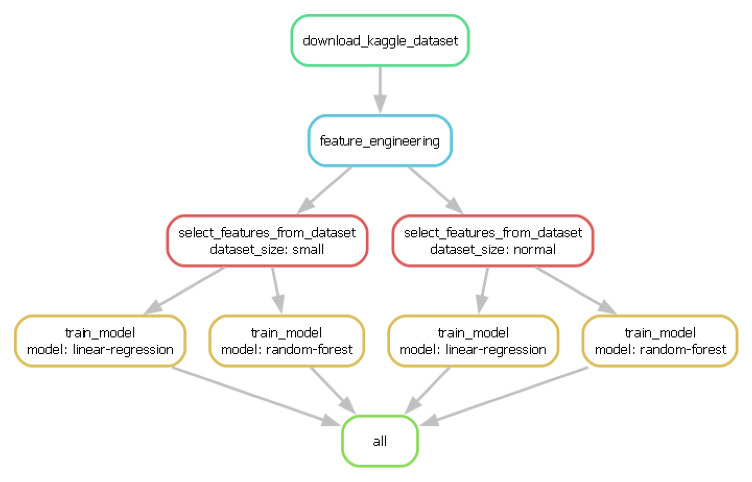

In [13]:
# | label: fig-dag
# | fig-cap: "Пайплайн"
import subprocess

import matplotlib.pyplot as plt
from PIL import Image

PIPELINE_IMAGE_FILENAME = "pipeline.png"

# Running
COMMAND = 'poetry run snakemake --dag -s "./../Snakefile" --configfile "./../workflows/config.yaml"'
COMMAND += f' | dot -T png > {PIPELINE_IMAGE_FILENAME}'
subprocess.run(COMMAND, shell=True)

# Visualize dag
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
img = Image.open(PIPELINE_IMAGE_FILENAME)
ax.imshow(img)
ax.axes.xaxis.set_visible(False)  # type: ignore[union-attr]
ax.axes.yaxis.set_visible(False)  # type: ignore[union-attr]
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

## Команды
Генерация изображения пайплайна
```bash
poetry run snakemake --dag | dot -T png > pipeline.png
```

Запуск пайплайна
```bash
poetry run snakemake --cores 16 all 
```